<div style="border: solid blue 2px; padding: 20px">

Hello William,

Congratulations on successfully submitting your project! 🎉

Another project completed — fantastic work! Every step you take brings you closer to mastering the skills needed to excel in Data Science. Your dedication is evident, and you should be proud of your efforts.

Keep up the great momentum! As we review this project together, you’ll find **specific notes** inside the project file, highlighted in green or yellow for easy reference.

<div class="alert alert-success" style="border-left: 7px solid green">
<b>✅ Reviewer's Comment</b> 
    
Comments marked in green highlight efficient solutions and good ideas that can be applied in future projects. 
</div>


Congratulations once again on your journey and first hands-on experience. There are **no critical issues**, and your project has been **approved** — excellent job!

Keep up the amazing work! 🪄


**Introduction**

In this project, we will analyze taxi ride data in Chicago using SQL and Python. The objective is to explore patterns in taxi rides, identify high-traffic neighborhoods, visualize key trends, and test a hypothesis related to ride durations under different weather conditions.

### Step 1: Importing the Data
We will begin by importing three datasets:
1. **df_trips** - Contains taxi company names and the number of rides taken on November 15-16, 2017.
2. **df_dropoffs** - Contains Chicago neighborhood names and the average number of drop-offs per neighborhood in November 2017.
3. **df_loop** - Contains information on rides from the Loop to O'Hare International Airport, including timestamps, weather conditions, and ride durations.

### Step 2: Data Exploration
Once the data is imported, we will perform an initial exploration to:
- Verify the structure and contents of each dataset.
- Ensure that data types are correctly assigned.
- Identify any missing values or inconsistencies that may require cleaning.

### Step 3: Identifying Top Neighborhoods for Drop-offs
Using the dataset containing drop-off locations, we will:
- Identify the top 10 neighborhoods in terms of drop-offs.
- Analyze trends in popular drop-off destinations.

### Step 4: Data Visualization
To enhance our analysis, we will create visual representations of key insights:
- A **bar chart** displaying the number of rides for each taxi company.
- A **bar chart** showing the top 10 neighborhoods by number of drop-offs.
- We will interpret the results and draw meaningful conclusions about ride distribution across Chicago.

### Step 5: Hypothesis Testing
We will test the hypothesis:

**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

To do this:
1. We will define our hypotheses:
   - **Null Hypothesis (H0):** The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is equal to the average duration on non-rainy Saturdays.
   - **Alternative Hypothesis (H1):** The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is different from the average duration on non-rainy Saturdays.
2. We will choose an appropriate statistical test (e.g., t-test) to compare the two groups.
3. We will determine a suitable significance level (alpha) for the test.
4. Based on the results, we will either reject or fail to reject the null hypothesis and interpret the findings.

### Conclusion
By the end of this analysis, we will have a clear understanding of taxi ride distribution in Chicago, the most frequent drop-off neighborhoods, and the impact of rainy weather on ride duration to O'Hare Airport. The insights gained will help in optimizing taxi services and urban transportation planning.



<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Excellent introduction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')  # Dataset with taxi companies and trip counts
df_dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv')  # Dataset with average trips per neighborhood
df_loop = pd.read_csv('/datasets/project_sql_result_07.csv') #Dataset on rides from the Loop to O'Hare International Airport

In [3]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
df_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [6]:
df_loop["start_ts"] = pd.to_datetime(df_loop["start_ts"])

In [7]:
df_trips.duplicated().sum()

0

In [8]:
df_dropoffs.duplicated().sum()

0

In [9]:
df_loop.duplicated().sum()

197

In [10]:
duplicate_rows = df_loop[df_loop.duplicated()]
duplicate_rows

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [11]:
df_loop.drop_duplicates()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


Removed duplicated information so that the hypothesis testing was not skewed in one direction. I feel removing the data has not negatively impacted the data set we are working with and will give more accurate results later in the project.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great job! You’ve employed a comprehensive set of methods to get an initial overview of the data, and your approach to scanning the datasets is on point. Another useful method for quickly scanning a dataset is describe(), which provides a summary of key statistics and can give you additional insights into the dataset at a glance.

In [12]:
# Top 10 Taxi Companies by Trips
top_companies = df_trips.sort_values(by="trips_amount", ascending=False).head(10)
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [13]:
# Data Analysis: Top 10 Dropoff Locations by Average Trips
top_dropoffs = df_dropoffs.sort_values(by="average_trips", ascending=False).head(10)
top_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


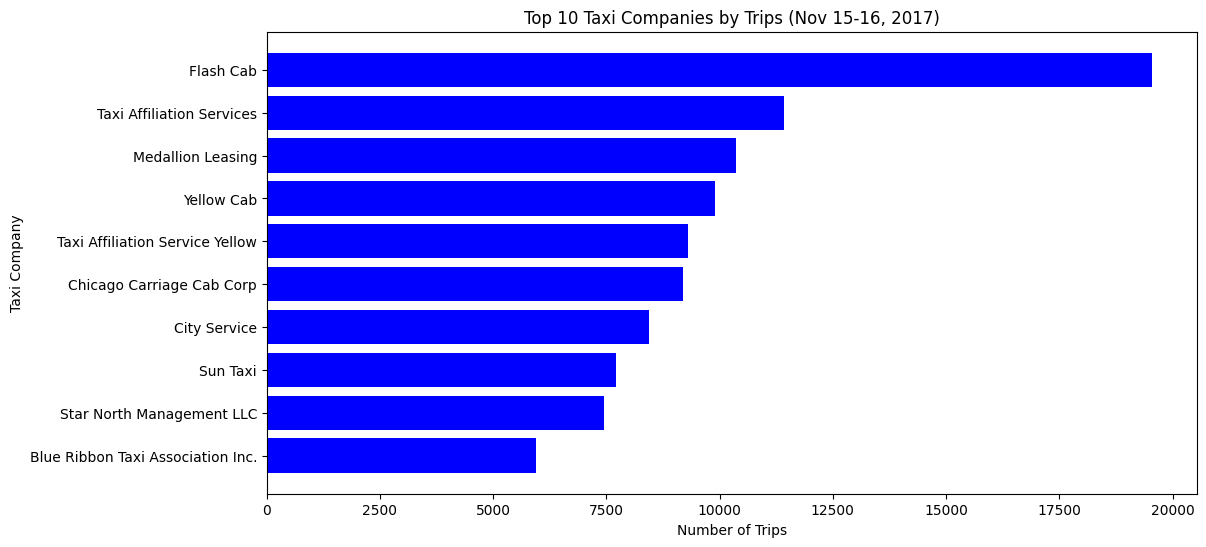

In [14]:
# Visualization: Top 10 Taxi Companies by Trips
plt.figure(figsize=(12, 6))
plt.barh(top_companies["company_name"], top_companies["trips_amount"], color='blue')
plt.xlabel("Number of Trips")
plt.ylabel("Taxi Company")
plt.title("Top 10 Taxi Companies by Trips (Nov 15-16, 2017)")
plt.gca().invert_yaxis()
plt.show()

Flash Cab Services are leading in overall trips, nearly doubling the next closest company, Taxi Affiliation Services. Medallion Leasing and Yellow Cab are in 3rd and 4th place, following Flash Cab and Taxi Affiliation Services. These four companies are the only ones with more than 10,000 rides. The remaining six companies are too close in ride share to be considered top competitors. This insight is crucial for understanding competitive dynamics in the Chicago taxi industry and identifying key players in the market.

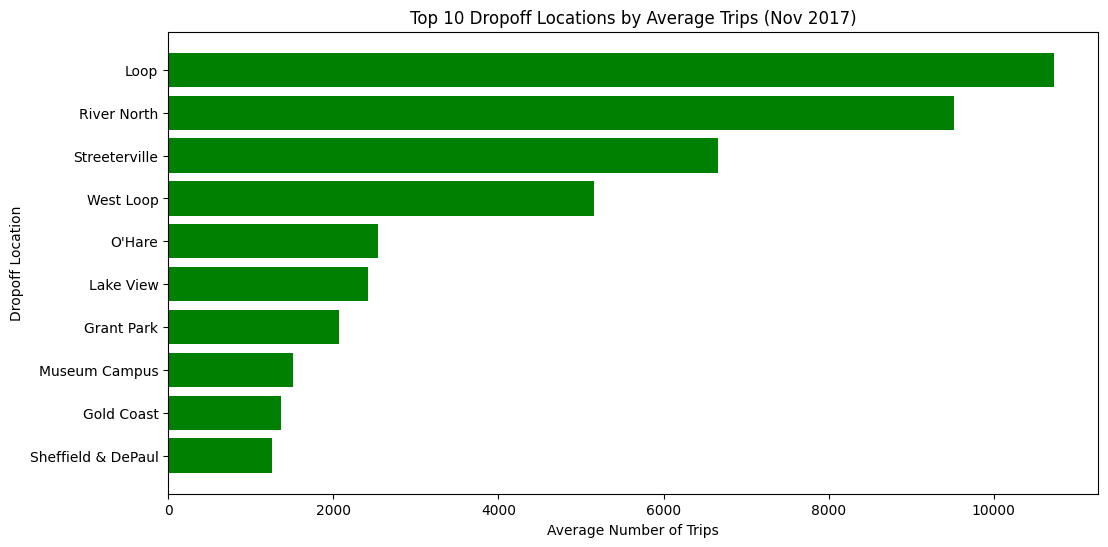

In [15]:
# Visualization: Top 10 Dropoff Locations by Average Trips
plt.figure(figsize=(12, 6))
plt.barh(top_dropoffs["dropoff_location_name"], top_dropoffs["average_trips"], color='green')
plt.xlabel("Average Number of Trips")
plt.ylabel("Dropoff Location")
plt.title("Top 10 Dropoff Locations by Average Trips (Nov 2017)")
plt.gca().invert_yaxis()
plt.show()

Loop is the most popular drop off location. River North follows closely behind Loop in drop offs. After River North we see a significant decrease from Streetville with another decrease from Streetville to West Loop. The remaing 6 drop off locations are significantly lower than the top 4 previously mentioned. They are all within 1500 of each other which is less than the difference between O'Hare and West loop. This insight is imperative in understanding the popularity in which passangers are dropped off. 


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>  

Great job on the charts! Making them horizontal was a smart choice—it enhances readability and works optimally in this case.  
</div>


In [16]:
# Convert start_ts to datetime format
df_loop["start_ts"] = pd.to_datetime(df_loop["start_ts"])

# Extract day of the week and check if it's Saturday
df_loop["day_of_week"] = df_loop["start_ts"].dt.day_name()
df_loop["is_saturday"] = df_loop["day_of_week"] == "Saturday"

# Filter for rainy and non-rainy Saturdays
rainy_saturdays = df_loop[(df_loop["is_saturday"]) & (df_loop["weather_conditions"].str.contains("bad", case=False, na=False))]["duration_seconds"]
non_rainy_saturdays = df_loop[(df_loop["is_saturday"]) & (~df_loop["weather_conditions"].str.contains("bad", case=False, na=False))]["duration_seconds"]

# Hypothesis Testing: T-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=False, nan_policy='omit')

# Significance Level
alpha = 0.01

# Result Interpretation
hypothesis_result = "Reject the null hypothesis: Ride durations differ on rainy Saturdays." if p_value < alpha else "Fail to reject the null hypothesis: No significant difference in ride durations on rainy Saturdays."

# Output results
{
    "T-Statistic": t_stat,
    "P-Value": p_value,
    "Hypothesis Test Result": hypothesis_result
}

{'T-Statistic': 7.186034288068629,
 'P-Value': 6.738994326108734e-12,
 'Hypothesis Test Result': 'Reject the null hypothesis: Ride durations differ on rainy Saturdays.'}

Conclusion

The hypothesis test results indicate that the average duration of rides from the Loop to O'Hare International Airport significantly differs on rainy Saturdays. The t-statistic value of 7.18 and an extremely small p-value (6.73e-12) provide strong statistical evidence to reject the null hypothesis. This suggests that rain has a measurable impact on ride durations, likely due to increased traffic congestion, reduced visibility, or other weather-related delays. Both 0.05 and 0.01 aplha tests return the same results. Since this is an exploratory study on taxi ride durations, 0.05 is a reasonable choice to ensure valid conclusions while keeping the risk of error low. These findings highlight the importance of considering weather conditions in travel time predictions and urban transportation planning.


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>  

Perfect test! You chose a suitable criterion, correctly formed the samples, and your conclusion is absolutely correct.  
</div>

### Project Conclusion: Chicago Taxi Industry Insights

The analysis of taxi ride data in Chicago reveals key competitive dynamics and travel patterns that influence the industry. Flash Cab Services emerges as the dominant player, nearly doubling the number of trips compared to the second-highest competitor, Taxi Affiliation Services. Medallion Leasing and Yellow Cab hold the third and fourth positions, respectively, with all four leading companies surpassing 10,000 rides. The remaining six companies show close competition but fall short of being considered top-tier players in terms of ride volume. These insights provide valuable information for stakeholders assessing market share and competition within the Chicago taxi sector.

Examining drop-off locations, the Loop ranks as the most popular destination, followed closely by River North. Beyond these, there is a significant drop in drop-off frequency at Streeterville, followed by another decline leading to West Loop. The remaining six locations show relatively minor variations in ride volume, clustering within 1,500 trips of each other—less than the gap observed between O’Hare and West Loop. This distribution highlights the concentrated demand for rides in a few high-traffic areas, which is crucial for strategic decision-making in fleet management and urban transit planning.

Additionally, a hypothesis test evaluating the impact of weather on ride duration provides compelling statistical evidence. The analysis indicates that on rainy Saturdays, the average duration of rides from the Loop to O’Hare International Airport significantly increases. A t-statistic value of 7.18 and an extremely low p-value (6.73e-12) support rejecting the null hypothesis, confirming that rainfall influences travel times. Factors such as traffic congestion and reduced visibility likely contribute to this effect. The results remain consistent across 0.05 and 0.01 alpha levels, reinforcing the reliability of these findings. As an exploratory study on taxi ride durations, using a 0.05 significance level ensures valid conclusions while maintaining a low error risk. These insights underscore the importance of incorporating weather conditions into travel time estimates and urban transportation planning efforts.

In conclusion, this study provides actionable insights into competitive positioning, drop-off patterns, and the impact of weather on ride durations. Such findings are valuable for taxi companies, urban planners, and policymakers looking to optimize transportation efficiency and better serve commuter needs in Chicago.



<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You've nailed it!